In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [47]:
def pre_process_simulation(df, columns, signals, new_columns):
    df = df[columns]
    for i, column in enumerate(new_columns):
        df[column] = df[signals[i]]
    for signal in new_columns:
        df[f'mag_{signal}'] = df[signal].apply(lambda x: float(x[1:-1].split(',')[0][:-2]))
        df[f'phase_{signal}'] = df[signal].apply(lambda x: float(x[1:-1].split(',')[1][:-1]))
    df = df.drop(new_columns, axis=1)
    df = df.drop(signals, axis=1)
    df['phase_complete_filter'][:107] = -df['phase_complete_filter'][:107]
    df['phase_complete_filter'][-99:] = -df['phase_complete_filter'][-99:]
    return df

In [48]:
df = pd.read_csv('../../data/electronics/passive_bandpass.txt', sep='\t', encoding='ISO-8859-1')
df.head()

,Freq.,V(n002)
0,1.000000,"(-6.79879847744457e+01dB,1.78919873827804e+02°)"
1,1.002305,"(-6.79479903129748e+01dB,1.78917384274230e+02°)"
2,1.004616,"(-6.79079958770616e+01dB,1.78914888984374e+02°)"
3,1.006932,"(-6.78680014668243e+01dB,1.78912387945034e+02°)"
4,1.009253,"(-6.78280070823811e+01dB,1.78909881142974e+02°)"


In [49]:
df['mag'] = df['V(n002)'].apply(lambda x: float(x.split(',')[0][1:-2]))
df['phase'] = df['V(n002)'].apply(lambda x: float(x.split(',')[1][:-2]))
df.head()

In [53]:
df_active = pd.read_csv('../../data/electronics/active_bandpass_filter.txt', sep='\t', encoding='ISO-8859-1')
df_active['mag'] = df_active['V(n011)'].apply(lambda x: float(x.split(',')[0][1:-2]))
df_active['phase'] = df_active['V(n011)'].apply(lambda x: float(x.split(',')[1][:-2]))
df_active['phase'][:5070] = 360+df_active['phase'][:5070]
df_active['phase'][-981:] = -360+df_active['phase'][-981:]
df_active.head()

Index(['Freq.', 'V(n011)'], dtype='object')


/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_50214/22030202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['phase'][:5070] = 360+df_active['phase'][:5070]
/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_50214/22030202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['phase'][-981:] = -360+df_active['phase'][-981:]


,Freq.,V(n011),mag,phase
0,0.100000,"(-3.84106576726054e+02dB,2.50977349866998e-01°)",-384.106577,360.250977
1,0.100231,"(-3.84026576227218e+02dB,2.50231221640213e-01°)",-384.026576,360.250231
2,0.100462,"(-3.83946575730712e+02dB,2.49486420012707e-01°)",-383.946576,360.249486
3,0.100693,"(-3.83866575236526e+02dB,2.48742941036315e-01°)",-383.866575,360.248743
4,0.100925,"(-3.83786574744648e+02dB,2.48000780769882e-01°)",-383.786575,360.248001


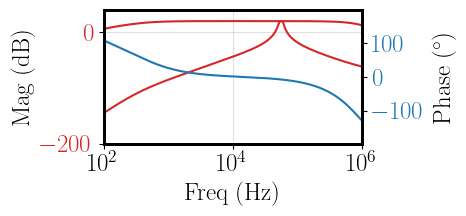

In [57]:
fig, ax1 = plt.subplots()
ax1.figure.set_figwidth=5.4*1.3*10
ax1.figure.set_figheight=10*4.2#= plt.figure(figsize=(5.4*1.3*10, 10*4.2))
ax1.figure.set_size_inches(5, 2.5, forward=True)
ax1.grid(alpha = 0.4)

colors = ['#1B4F72', '#2E86C1', '#85C1E9']
labels = [r'$G_{fb}=\,$', r'$G_{fb} =\,$', r'$G_{fb}=\,$']

color = 'tab:red'
ax1.set_xlabel('Freq (Hz)')
ax1.grid(True, which="both", ls="-")
ax1.set_ylabel('Mag (dB)')
ax1.plot(df['Freq.'], df['mag'], color=color)
ax1.plot(df_active['Freq.'], df_active['mag'], color=color)
ax1.set_ylim([-200, 40])
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'Phase (${}^\circ$)')
ax2.set_xscale('log')
ax2.plot(df['Freq.'], df['phase'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim([1e2, 1e6])
fig.tight_layout()
plt.show()

Index(['Freq.', 'V(n011)'], dtype='object')


/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_50214/3869331053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase'][:5070] = 360+df['phase'][:5070]
/var/folders/fy/4wjvjmc95f1fv0gy4d27l6_h0000gn/T/ipykernel_50214/3869331053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phase'][-981:] = -360+df['phase'][-981:]


,Freq.,V(n011),mag,phase
0,0.100000,"(-3.84106576726054e+02dB,2.50977349866998e-01°)",-384.106577,360.250977
1,0.100231,"(-3.84026576227218e+02dB,2.50231221640213e-01°)",-384.026576,360.250231
2,0.100462,"(-3.83946575730712e+02dB,2.49486420012707e-01°)",-383.946576,360.249486
3,0.100693,"(-3.83866575236526e+02dB,2.48742941036315e-01°)",-383.866575,360.248743
4,0.100925,"(-3.83786574744648e+02dB,2.48000780769882e-01°)",-383.786575,360.248001


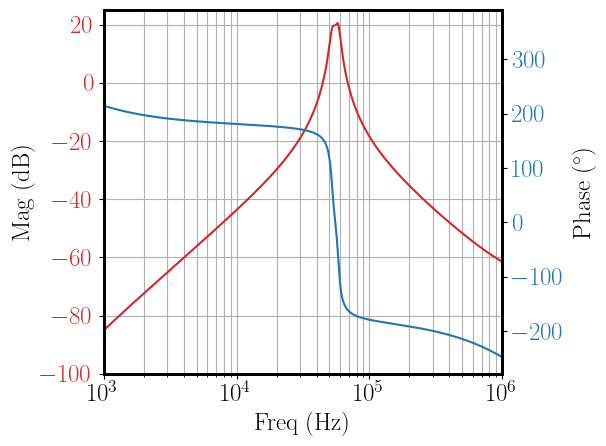

In [44]:
fig, ax1 = plt.subplots()

plt.rcParams.update({'font.size': 18})
plt.rcParams["axes.linewidth"] = 2
color = 'tab:red'
ax1.set_xlabel('Freq (Hz)')
ax1.grid(True, which="both", ls="-")
ax1.set_ylabel('Mag (dB)')
ax1.plot(df['Freq.'],df['mag'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-100, 25])

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel(r'Phase (${}^\circ$)')
ax2.set_xscale('log')
ax2.plot(df['Freq.'], df['phase'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim([1e3, 1e6])
#ax2.set_ylim([-200, 200])
fig.tight_layout()
plt.show()